# DGD

## Café com dados sem dados

In [15]:
%load_ext autoreload

%autoreload 2


from IPython.core.interactiveshell import InteractiveShell

from IPython.core.display import display, HTML


InteractiveShell.ast_node_interactivity = 'all'

display(HTML("<style>.container { width:130% !important; }</style>"))


from sklearn.metrics import f1_score


import os


import warnings

warnings.filterwarnings('ignore')


import pandas as pd


from os.path import join


import numpy as np

randn = np.random.randn


from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC, LinearSVC

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Conteúdo

## Demonstrações rápidas

1. [Visualizando mapas com folium](#folium)  
1. [Acelerando o processamento com numba](#numba)  
1. [Dask: um dataframe alternativo](#dask)  
1. [swifter: pandas com super-poderes](#swifter)  

## Modelo completo
1. [Navegação usando qgrid](#qgrid)  
1. [plotly com cufflinks: pandas com esteróides](#plotly)  
1. [machine learning com xgboost](#xgboost)
1. [machine learning com lightgbm](#lgbm)
1. [interpretabilidade com shap](#shap)


## Demonstrações rápidas

### 1. Visualizando mapas com folium <a id='folium'></a>

![folium](images/folium.png)


[Abrir aqui](http://10.244.203.24:50380/notebooks/src/bia/ContasBIA.ipynb)

In [2]:
import folium

### 2. Acelerando o processamento com numba <a id='numba'></a>

![numba](images/numba.png)

In [4]:
from numba import jit
import random

@jit(nopython=True)
def calcula_pi(nsamples, parallel=True):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

%time calcula_pi(100000000)

CPU times: user 1.49 s, sys: 12 ms, total: 1.51 s
Wall time: 1.51 s


3.14162944

### 3. Dask - Um dataframe alternativo

![Dask](images/dask.png)

In [4]:
def carrega_df():
    a = '/home/jbernal/RH_WORK/ArqProcedimentos/'
    lista = os.listdir(a)
    df = pd.DataFrame()
    b = 1
    for c in lista:
        print(c)
        c = a+c
        b = b+1
        df = pd.concat([df, pd.read_csv(str(c), sep = ';', encoding='latin1')])
    len(df)
    return df
%time df = carrega_df()

ArqProcedimentos_201608.csv
ArqProcedimentos_201806.csv
ArqProcedimentos_201709.csv
ArqProcedimentos_201610.csv
ArqProcedimentos_201603.csv
ArqProcedimentos_201712.csv
ArqProcedimentos_201505.csv
ArqProcedimentos_201310.csv
ArqProcedimentos_201802.csv
ArqProcedimentos_201708.csv
ArqProcedimentos_201308.csv
ArqProcedimentos_201609.csv
ArqProcedimentos_201611.csv
ArqProcedimentos_201501.csv
ArqProcedimentos_201605.csv
ArqProcedimentos_201701.csv
ArqProcedimentos_201807.csv
ArqProcedimentos_201710.csv
ArqProcedimentos_201406.csv
ArqProcedimentos_201509.csv
ArqProcedimentos_201504.csv
ArqProcedimentos_201812.csv
ArqProcedimentos_201411.csv
ArqProcedimentos_201805.csv
ArqProcedimentos_201703.csv
ArqProcedimentos_201304.csv
ArqProcedimentos_201711.csv
ArqProcedimentos_201307.csv
ArqProcedimentos_201601.csv
ArqProcedimentos_201407.csv
ArqProcedimentos_201707.csv
ArqProcedimentos_201808.csv
ArqProcedimentos_201810.csv
ArqProcedimentos_201402.csv
ArqProcedimentos_201405.csv
ArqProcedimentos_201

In [5]:
import dask.dataframe as dd
ddf = dd.read_csv('/home/jbernal/RH_WORK/ArqProcedimentos/*.csv', sep = ';', encoding='latin1')
ddf.head()

IdFuncionario  DataPagamento  DataEvento  CodigoReferenciado  \
0   8.265142e+12       20190121    20121211          1416021900   
1   8.265142e+12       20190121    20121211          1416021900   
2   8.265142e+12       20190121    20121211          1416021900   
3   8.500798e+12       20140116    20121202              867098   
4   8.500798e+12       20140116    20121202              867098   

  ReferenciadoTipo     TipoEvento  \
0    PESSOA FISICA  EXAME SIMPLES   
1    PESSOA FISICA         EVENTO   
2    PESSOA FISICA  EXAME SIMPLES   
3  PESSOA JURIDICA  EXAME SIMPLES   
4  PESSOA JURIDICA  EXAME SIMPLES   

                                    ProcedimentoNome  ProcedimentoCodigo  \
0           BIOIMPEDANCIOMETRIA (AMBULATORIAL) EXAME            41301048   
1    ANALISE DA PROPORCIONALIDADE CINEANTROPOMETRICA            20101023   
2         CALORIMETRIA INDIRETA (AMBULATORIAL) EXAME            41301064   
3  HEMOCULTURA P/ BACTERIAS ANAEROBIAS (POR AMOSTRA)            40310264   
4                          ANTIBIOGRAMA AUTOMATIZADO            40310426   

               ProcedimentoGrupo  EspecialidadeCodigo  ...  ValorInssIss02  \
0  NUTRICAO PARENTERAL E ENTERAL                   16  ...             ,00   
1                      CONSULTAS                   16  ...             ,00   
2  NUTRICAO PARENTERAL E ENTERAL                   16  ...             ,00   
3              PATOLOGIA CLINICA                    0  ...             ,00   
4              PATOLOGIA CLINICA                    0  ...             ,00   

  ValorRecibo  FlagPacienteInternado FlagReembolso FlagTrocaAcomodacao  \
0         ,00                  False         False               False   
1         ,00                  False         False               False   
2         ,00                  False         False               False   
3         ,00                   True         False               False   
4         ,00                   True         False               False   

  NumeroApolice NumeroCertificado NumeroContrato  MatriculaEspecial  \
0          6001           5114721           6001                      
1          6001           5114721           6001                      
2          6001           5114721           6001                      
3          6001           6240011           6001                      
4          6001           6240011           6001                      

   PlanoSegurado  
0           Q123  
1           Q123  
2           Q123  
3           Q123  
4           Q123  

[5 rows x 26 columns]

In [6]:
ddf[ddf['TipoEvento']=='EXAME SIMPLES'].head()

IdFuncionario  DataPagamento  DataEvento  CodigoReferenciado  \
0   8.265142e+12       20190121    20121211          1416021900   
2   8.265142e+12       20190121    20121211          1416021900   
3   8.500798e+12       20140116    20121202              867098   
4   8.500798e+12       20140116    20121202              867098   
5   8.500798e+12       20140116    20121202              867098   

  ReferenciadoTipo     TipoEvento  \
0    PESSOA FISICA  EXAME SIMPLES   
2    PESSOA FISICA  EXAME SIMPLES   
3  PESSOA JURIDICA  EXAME SIMPLES   
4  PESSOA JURIDICA  EXAME SIMPLES   
5  PESSOA JURIDICA  EXAME SIMPLES   

                                    ProcedimentoNome  ProcedimentoCodigo  \
0           BIOIMPEDANCIOMETRIA (AMBULATORIAL) EXAME            41301048   
2         CALORIMETRIA INDIRETA (AMBULATORIAL) EXAME            41301064   
3  HEMOCULTURA P/ BACTERIAS ANAEROBIAS (POR AMOSTRA)            40310264   
4                          ANTIBIOGRAMA AUTOMATIZADO            40310426   
5                          ANTIBIOGRAMA AUTOMATIZADO            40310426   

               ProcedimentoGrupo  EspecialidadeCodigo  ...  ValorInssIss02  \
0  NUTRICAO PARENTERAL E ENTERAL                   16  ...             ,00   
2  NUTRICAO PARENTERAL E ENTERAL                   16  ...             ,00   
3              PATOLOGIA CLINICA                    0  ...             ,00   
4              PATOLOGIA CLINICA                    0  ...             ,00   
5              PATOLOGIA CLINICA                    0  ...             ,00   

  ValorRecibo  FlagPacienteInternado FlagReembolso FlagTrocaAcomodacao  \
0         ,00                  False         False               False   
2         ,00                  False         False               False   
3         ,00                   True         False               False   
4         ,00                   True         False               False   
5         ,00                   True         False               False   

  NumeroApolice NumeroCertificado NumeroContrato  MatriculaEspecial  \
0          6001           5114721           6001                      
2          6001           5114721           6001                      
3          6001           6240011           6001                      
4          6001           6240011           6001                      
5          6001           6240011           6001                      

   PlanoSegurado  
0           Q123  
2           Q123  
3           Q123  
4           Q123  
5           Q123  

[5 rows x 26 columns]

In [7]:
df = ddf.compute() # <= converte de dask para pandas

### 4. swifter - pandas com super-poderes <a id='swifter'></a>

![Swifter](images/swifter.png)

In [11]:
%time df2 = ddf['ProcedimentoCodigo'].apply(lambda x: x * 0.05)

import swifter
%time df2 = df['ProcedimentoCodigo'].swifter.apply(lambda x: x * 0.05)

CPU times: user 3.83 ms, sys: 1.79 ms, total: 5.63 ms
Wall time: 5.68 ms
CPU times: user 53.9 ms, sys: 70 µs, total: 54 ms
Wall time: 53.4 ms


---
## Modelo completo

### Carregando os dados <a id='dados'></a>

Para este Café com Dados, usaremos o famoso dataset do **Titanic**, disponível em:  
https://www.kaggle.com/c/titanic/data

Carregando os dados da pasta `titanic` para o pandas. São dois arquivos: `train.csv` e `test.csv`

|Variável | Descrição                              | Chave                                        |
|---------|----------------------------------------|----------------------------------------------|
|survival | sobreviveu	                           |0 = Nao, 1 = Sim                              |
|pclass	  |classe                                  |1 = 1st, 2 = 2nd, 3 = 3rd                     |
|sex	  |sexo	                                   ||
|Age	  |idade em anos	                       ||
|sibsp	  |# de irmãos / conges (conjuges) a bordo ||
|parch	  |# de pais / criancas a bordo	           ||
|ticket	  |numero do ticket                        ||
|fare	  |valor pago	                           ||
|cabin	  |numero da cabine	                       ||
|embarked |local de embarque	                   |C = Cherbourg, Q = Queenstown, S = Southampton|

In [12]:
# caminho dos dados
data_dir = 'titanic'
train_file = join(data_dir,'train.csv')
test_file = join(data_dir, 'test.csv')

# carrega para os dataframes
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# salvar o PassengerId 
passengerId = test.PassengerId

# juntando o treino e o teste
titanic = train.append(test, ignore_index=True)

# indices para conseguir separar depois
train_idx = len(train)
test_idx = len(titanic) - len(test)

### 1. Navegação usando qgrid <a id='qgrid'></a>

In [16]:
import qgrid
qgrid.show_grid(train)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### 2. Plotly com cufflinks - Pandas com esteróides <a id='plotly'></a>

In [17]:
import plotly.plotly as py

from plotly.graph_objs import *

import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import cufflinks

train.corr().iplot(kind='heatmap', colorscale='RdBu')

In [18]:
# pegando o cargo
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
print (titanic[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

           Title  Survived
0           Capt  0.000000
1            Col  0.500000
2            Don  0.000000
3           Dona       NaN
4             Dr  0.428571
5       Jonkheer  0.000000
6           Lady  1.000000
7          Major  0.500000
8         Master  0.575000
9           Miss  0.697802
10          Mlle  1.000000
11           Mme  1.000000
12            Mr  0.156673
13           Mrs  0.792000
14            Ms  1.000000
15           Rev  0.000000
16           Sir  1.000000
17  the Countess  1.000000


In [19]:
# Agrupando por Sex, Pclass e Title 
grouped = titanic.groupby(['Sex','Pclass', 'Title']) 

# Preenchendo a idade pelo valor provavel
titanic.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

# troca NaN por U (unknown)
titanic.Cabin = titanic.Cabin.fillna('U')

# Encontra o mais comum embarked
most_embarked = titanic.Embarked.value_counts().index[0]

# Preenche os NaN pelo mais comum
titanic.Embarked = titanic.Embarked.fillna(most_embarked)

# completa o fare pela mediana
titanic.Fare = titanic.Fare.fillna(titanic.Fare.median())

# cria uma nova variavel com o tamanho da familia
titanic['FamilySize'] = titanic.Parch + titanic.SibSp + 1

# retirando a letra da string
titanic.Cabin = titanic.Cabin.map(lambda x: x[0])

In [20]:
# convertendo categorias para numeros
titanic.Sex = titanic.Sex.map({"male": 0, "female":1})
pclass_dummies = pd.get_dummies(titanic.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(titanic.Title, prefix="Title")
cabin_dummies = pd.get_dummies(titanic.Cabin, prefix="Cabin")
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix="Embarked")
titanic_dummies = pd.concat([titanic, pclass_dummies, title_dummies, cabin_dummies, embarked_dummies], axis=1)

# apagando as colunas com as categorias
titanic_dummies.drop(['Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [21]:
# gerando conjunto de treino e teste
train = titanic_dummies[ :train_idx]
test = titanic_dummies[test_idx: ]

# volta o survived para int
train.Survived = train.Survived.astype(int)

# cria X e Y 
X_train_df = train.drop('Survived', axis=1)
X_train = X_train_df.values 
Y_train = train.Survived.values

# criando array de teste (nao usei, pois nao temos a solucao do kaggle)
X_test = test.drop('Survived', axis=1).values

In [22]:
train.corr().iplot(kind='heatmap', colorscale='RdBu')

In [23]:
# agrupando as idades
idade_df = train.copy(deep=True)
idade_df['categoria'] = pd.cut(train['Age'], 6)
print (idade_df[['categoria', 'Survived']].groupby(['categoria'], as_index=False).mean())

          categoria  Survived
0    (0.34, 13.683]  0.586667
1  (13.683, 26.947]  0.310992
2   (26.947, 40.21]  0.431818
3   (40.21, 53.473]  0.403101
4  (53.473, 66.737]  0.348837
5    (66.737, 80.0]  0.142857


In [24]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
#Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train), 2)
acc_linear_svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

0.78

In [25]:
# otimização de parametros
forrest_params = dict(     
    max_depth = [n for n in range(9, 14)],     
    min_samples_split = [n for n in range(4, 11)], 
    min_samples_leaf = [n for n in range(2, 5)],     
    n_estimators = [n for n in range(10, 60, 10)],
)
forrest = RandomForestClassifier()

In [26]:
# ajusta o modelo
forest_cv = GridSearchCV(estimator=forrest, param_grid=forrest_params, cv=2, n_jobs=-1) 
forest_cv.fit(X_train, Y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [9, 10, 11, 12, 13], 'min_samples_split': [4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [2, 3, 4], 'n_estimators': [10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
print("Score: {}".format(forest_cv.best_score_))

Score: 0.8271604938271605


### 3. Machine learning com xgboost <a id='xgboost'></a>

![xgboost](images/boosting.png)

In [28]:
from xgboost import XGBClassifier
xgbr = XGBClassifier(n_estimators=1000, learn_rate=0.05, random_state=1)
xgbr.fit(X_train,Y_train)
xgbr_score = round(xgbr.score(X_train, Y_train),4)
print(xgbr_score)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learn_rate=0.05,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

0.9933


### 4. Machine learning com lightgbm <a id='lightgbm'></a>

In [29]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
param_grid = {'n_estimators':[20],'max_depth':[2,3,4]} 
lgbm = GridSearchCV(model, param_grid=param_grid, cv = 10, n_jobs=4, return_train_score = False)
lgbm.fit(X_train, Y_train)

lgbm_score = lgbm.score(X_train, Y_train)
print(lgbm_score)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [20], 'max_depth': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

0.8327721661054994


### 5. Interpretabilidade com shap (Narumi, abrir no jupyter lab) <a id='shap'></a>

![shap](images/shap.png)

In [30]:
import shap

shap.initjs()
model = xgbr

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# força da explicação para a serie
shap.force_plot(explainer.expected_value, shap_values, X_train_df)

In [32]:
# Força da explicação
shap.force_plot(explainer.expected_value, shap_values[1,:], X_train_df.iloc[1,:])

#### Interaction index
$ \Phi_{i,j} = \sum_{S ~ \subseteq ~  \mathbb{N}_{i,j}}  \frac{|S|!(M-|S|-2)!}{M!} \nabla_{i,j}(S) $

sendo:

$
\nabla_{i,j}(S) = f_{x}(S \cup \{i,j\}) - f_{x}(S \cup \{j\}) - [f_{x}(S \cup \{i\}) - f(S)]
$

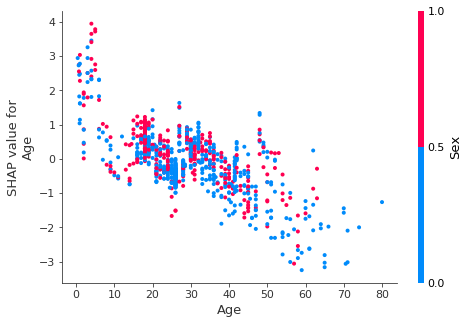

In [34]:
# plota dependencia
shap.dependence_plot("Age", shap_values, X_train_df, interaction_index='Sex')

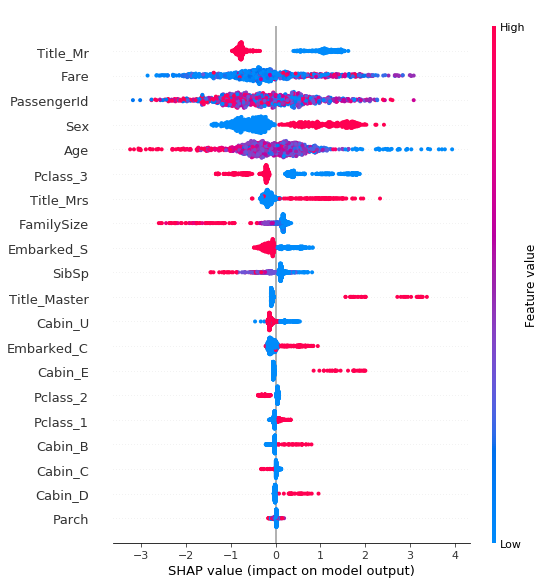

In [35]:
# sumario
shap.summary_plot(shap_values, X_train_df)

In [36]:
# sumario em barra
shap.summary_plot(shap_values, X_train_df, plot_type="bar")